## 04 - 02 Various types of Plots
In previous module we saw one of the basic types of plots -- line plots. Apart from line plots there are various different types of plots supported by matplotlib. 

In this module we shall take a look at some of them.

> In this module, instead of plotting random data, we will load some of the publicly available datasets and plot them.

> To load these files, we will be using `read_csv` function from `pandas` module.. somthing that we will dig deeper in the last module.

In [2]:
# Our boilerplate imports
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import numpy as np
import pandas as pd

In [73]:
global_surface_temp = pd.read_csv('sample_datasets/global_surface_temp.csv', skiprows=1, 
                                  na_values="***")
global_co2_emission = pd.read_csv('sample_datasets/global_co2_emission.csv')

### 04 - 02.01 Scatter plots
Scatter plots are similar to line plots except that instead of points being joined by line segments, in scatter plots, the points are represented by a shape like circle, triangle, dot etc. These shapes are known as markers

Lets take a look at a simple sine plot

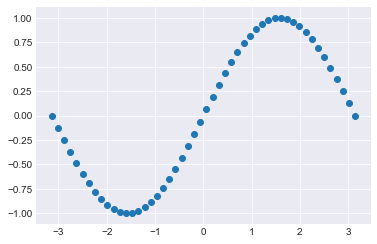

In [76]:
fig = plt.figure()
ax = fig.add_subplot(111) 
theta = np.linspace(-np.pi, np.pi, 50)
plt.scatter(theta, np.sin(theta))

#### Markers

There are various types of markers supported by matplotlib. Below is a visual representation of them

marker     |  description  ||marker    |  description  ||marker    |  description  ||marker    |  description  
:----------|:--------------||:---------|:--------------||:---------|:--------------||:---------|:--------------
"."        |  point        ||"+"       |  plus         ||","       |  pixel        ||"x"       |  cross
"o"        |  circle       ||"D"       |  diamond      ||"d"       |  thin_diamond ||          |
"8"        |  octagon      ||"s"       |  square       ||"p"       |  pentagon     ||"\*"      |  star
"&#124;"   |  vertical line||"\_"      | horizontal line ||"h"     |  hexagon1     ||"H"       |  hexagon2
0          |  tickleft     ||4         |  caretleft    ||"<"       | triangle_left ||"3"       |  tri_left
1          |  tickright    ||5         |  caretright   ||">"       | triangle_right||"4"       |  tri_right
2          |  tickup       ||6         |  caretup      ||"^"       | triangle_up   ||"2"       |  tri_up
3          |  tickdown     ||7         |  caretdown    ||"v"       | triangle_down ||"1"       |  tri_down
"None"     |  nothing      ||`None`    |  nothing      ||" "       |  nothing      ||""        |  nothing

<img src="images/mpl_markers.png" />
> Code to generate this plot is in `XX - Miscellaneous plots.ipynb` notebook

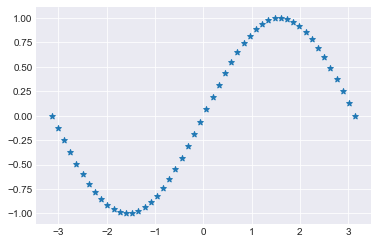

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111) 
theta = np.linspace(-np.pi, np.pi, 50)
plt.scatter(theta, np.sin(theta), marker="*")

Just before this sine plot, we also loaded global carbon emissions dataset. Lets 